In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from scipy.stats import pearsonr
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path_1 = '/content/drive/MyDrive/Colab Notebooks/minors_batting_advanced.csv'
file_path_2 = '/content/drive/MyDrive/Colab Notebooks/minors_batting_profile.csv'
file_path_3 = '/content/drive/MyDrive/Colab Notebooks/minors_batting_standard.csv'

mbatting1 = pd.read_csv(file_path_1)
mbatting2 = pd.read_csv(file_path_2)
mbatting3 = pd.read_csv(file_path_3)

mbatting4 = pd.merge(mbatting3, mbatting2.drop(columns = ['Name', 'Age', 'PA']), on=['PlayerId', 'Season', 'Team', 'Level'], how='inner')
mbatting = pd.merge(mbatting4, mbatting1.drop(columns = ['Name', 'Age', 'BABIP', 'PA', 'AVG']), on=['PlayerId', 'Season', 'Team', 'Level'], how='inner')

mbatting = mbatting[~((mbatting['PA'] == 0) | (mbatting['PA'].isna()))]
print(mbatting.columns)

Index(['Season', 'Name', 'Team', 'Level', 'Age', 'G', 'AB', 'PA', 'H', '1B',
       '2B', '3B', 'HR', 'R', 'RBI', 'BB', 'IBB', 'SO', 'HBP', 'SF', 'SH',
       'GDP', 'SB', 'CS', 'AVG', 'PlayerId', 'BABIP', 'GB/FB', 'LD%', 'GB%',
       'FB%', 'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'SwStr%', 'Balls',
       'Strikes', 'Pitches', 'BB%', 'K%', 'BB/K', 'OBP', 'SLG', 'OPS', 'ISO',
       'Spd', 'wSB', 'wRC', 'wRAA', 'wOBA', 'wRC+'],
      dtype='object')


In [ ]:
file_path_1 = '/content/drive/MyDrive/Colab Notebooks/stats_MLB_batter_2007_2024.csv'

majorsbatting = pd.read_csv(file_path_1)

temp = majorsbatting['last_name, first_name'].str.split(', ', expand=True)
temp.columns = ['last', 'first']
majorsbatting['Name'] = temp['first'] + " " + temp['last']
majorsbatting['Name'] = majorsbatting['Name'].str.rstrip()
majorsbatting['FirstYear'] = majorsbatting.groupby('Name')['year'].transform('min')
majorsbatting = majorsbatting[majorsbatting['year'] == majorsbatting['FirstYear']]

majorsbatting = pd.merge(mbatting, majorsbatting, left_on='Name', right_on='Name', how='inner')
majorsbatting = majorsbatting[majorsbatting['Season'] <= majorsbatting['FirstYear']]

print(majorsbatting.columns)

Index(['Season', 'Name', 'Team', 'Level', 'Age', 'G', 'AB', 'PA', 'H', '1B',
       '2B', '3B', 'HR', 'R', 'RBI', 'BB', 'IBB', 'SO', 'HBP', 'SF', 'SH',
       'GDP', 'SB', 'CS', 'AVG', 'PlayerId', 'BABIP', 'GB/FB', 'LD%', 'GB%',
       'FB%', 'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'SwStr%', 'Balls',
       'Strikes', 'Pitches', 'BB%', 'K%', 'BB/K', 'OBP', 'SLG', 'OPS', 'ISO',
       'Spd', 'wSB', 'wRC', 'wRAA', 'wOBA', 'wRC+', 'last_name, first_name',
       'player_id', 'year', 'pa', 'k_percent', 'bb_percent', 'woba', 'xwoba',
       'sweet_spot_percent', 'barrel_batted_rate', 'hard_hit_percent',
       'avg_best_speed', 'avg_hyper_speed', 'whiff_percent', 'swing_percent',
       'FirstYear'],
      dtype='object')


In [ ]:
file_path_1 = '/content/drive/MyDrive/Colab Notebooks/MLB Batting Advanced.csv'
file_path_2 = '/content/drive/MyDrive/Colab Notebooks/MLB Batting Profile.csv'
file_path_3 = '/content/drive/MyDrive/Colab Notebooks/MLB Batting Standard.csv'
file_path_4 = '/content/drive/MyDrive/Colab Notebooks/MLB Batter Age.csv'

mbatting1 = pd.read_csv(file_path_1)
mbatting2 = pd.read_csv(file_path_2)
mbatting3 = pd.read_csv(file_path_3)
mbatting5 = pd.read_csv(file_path_4)

mbatting4 = pd.merge(mbatting3, mbatting2.drop(columns = ['Name', 'NameASCII', 'MLBAMID']), on=['PlayerId', 'Season', 'Team'], how='inner')
batting = pd.merge(mbatting4, mbatting1.drop(columns = ['Name', 'BABIP', 'AVG', 'PA', 'NameASCII', 'MLBAMID']), on=['PlayerId', 'Season', 'Team'], how='inner')
batting = pd.merge(batting, mbatting5.drop(columns = ['NameASCII', 'PlayerId', 'MLBAMID']), on=['Name', 'Season', 'Team'], how='inner')

batting = batting[~((batting['PA'] == 0) | (batting['PA'].isna()))]
print(batting.columns)

Index(['Season', 'Name', 'Team', 'G', 'AB', 'PA', 'H', '1B', '2B', '3B', 'HR',
       'R', 'RBI', 'BB', 'IBB', 'SO', 'HBP', 'SF', 'SH', 'GDP', 'SB', 'CS',
       'AVG', 'NameASCII', 'PlayerId', 'MLBAMID', 'BABIP', 'GB/FB', 'LD%',
       'GB%', 'FB%', 'IFFB%', 'HR/FB', 'IFH', 'IFH%', 'BUH', 'BUH%', 'Pull%',
       'Cent%', 'Oppo%', 'Soft%', 'Med%', 'Hard%', 'BB%', 'K%', 'BB/K', 'OBP',
       'SLG', 'OPS', 'ISO', 'Spd', 'UBR', 'wGDP', 'XBR', 'wSB', 'wRC', 'wRAA',
       'wOBA', 'wRC+', 'Age'],
      dtype='object')


In [ ]:
# Age 21 subset
batting21 = batting[batting['Age'] == 21].copy()
batting21 = batting21.drop(columns=[
    'Season','G','AB','H','1B','2B','3B','R','RBI','BB','IBB','SO',
    'HBP','SF','SH','GDP','SB','CS','PlayerId','NameASCII','MLBAMID',
    'GB/FB','LD%','GB%','FB%','IFFB%','HR/FB','Pull%','Cent%','Oppo%',
    'SwStr%','Balls','Strikes','Pitches','OBP','SLG','OPS','ISO','Spd',
    'wSB','wRC','wRAA','wOBA','wRC+','Age'
], errors='ignore')
batting21 = batting21.rename(columns={
    'AVG': 'AVG21',
    'PA': 'PA21',
    'BABIP': 'BABIP21',
    'K%': 'K%21',
    'BB%': 'BB%21',
    'HR': 'HR21'
})

# Age 22 subset
batting22 = batting[batting['Age'] == 22].copy()
batting22 = batting22.drop(columns=[
    'Season','G','AB','H','1B','2B','3B','R','RBI','BB','IBB','SO',
    'HBP','SF','SH','GDP','SB','CS','PlayerId','NameASCII','MLBAMID',
    'GB/FB','LD%','GB%','FB%','IFFB%','HR/FB','Pull%','Cent%','Oppo%',
    'SwStr%','Balls','Strikes','Pitches','OBP','SLG','OPS','ISO','Spd',
    'wSB','wRC','wRAA','wOBA','wRC+','Age'
], errors='ignore')
batting22 = batting22.rename(columns={
    'AVG': 'AVG22',
    'PA': 'PA22',
    'BABIP': 'BABIP22',
    'K%': 'K%22',
    'BB%': 'BB%22',
    'HR': 'HR22'
})

# Age 23 subset
batting23 = batting[batting['Age'] == 23].copy()
batting23 = batting23.drop(columns=[
    'Season','G','AB','H','1B','2B','3B','R','RBI','BB','IBB','SO',
    'HBP','SF','SH','GDP','SB','CS','PlayerId','NameASCII','MLBAMID',
    'GB/FB','LD%','GB%','FB%','IFFB%','HR/FB','Pull%','Cent%','Oppo%',
    'SwStr%','Balls','Strikes','Pitches','OBP','SLG','OPS','ISO','Spd',
    'wSB','wRC','wRAA','wOBA','wRC+','Age'
], errors='ignore')
batting23 = batting23.rename(columns={
    'AVG': 'AVG23',
    'PA': 'PA23',
    'BABIP': 'BABIP23',
    'K%': 'K%23',
    'BB%': 'BB%23',
    'HR': 'HR23'
})

# Age 24 subset
batting24 = batting[batting['Age'] == 24].copy()
batting24 = batting24.drop(columns=[
    'Season','G','AB','H','1B','2B','3B','R','RBI','BB','IBB','SO',
    'HBP','SF','SH','GDP','SB','CS','PlayerId','NameASCII','MLBAMID',
    'GB/FB','LD%','GB%','FB%','IFFB%','HR/FB','Pull%','Cent%','Oppo%',
    'SwStr%','Balls','Strikes','Pitches','OBP','SLG','OPS','ISO','Spd',
    'wSB','wRC','wRAA','wOBA','wRC+','Age'
], errors='ignore')
batting24 = batting24.rename(columns={
    'AVG': 'AVG24',
    'PA': 'PA24',
    'BABIP': 'BABIP24',
    'K%': 'K%24',
    'BB%': 'BB%24',
    'HR': 'HR24'
})

# Age 25 subset
batting25 = batting[batting['Age'] == 25].copy()
batting25 = batting25.drop(columns=[
    'Season','G','AB','H','1B','2B','3B','R','RBI','BB','IBB','SO',
    'HBP','SF','SH','GDP','SB','CS','PlayerId','NameASCII','MLBAMID',
    'GB/FB','LD%','GB%','FB%','IFFB%','HR/FB','Pull%','Cent%','Oppo%',
    'SwStr%','Balls','Strikes','Pitches','OBP','SLG','OPS','ISO','Spd',
    'wSB','wRC','wRAA','wOBA','wRC+','Age'
], errors='ignore')
batting25 = batting25.rename(columns={
    'AVG': 'AVG25',
    'PA': 'PA25',
    'BABIP': 'BABIP25',
    'K%': 'K%25',
    'BB%': 'BB%25',
    'HR': 'HR25'
})

# Age 26 subset
batting26 = batting[batting['Age'] == 26].copy()
batting26 = batting26.drop(columns=[
    'Season','G','AB','H','1B','2B','3B','R','RBI','BB','IBB','SO',
    'HBP','SF','SH','GDP','SB','CS','PlayerId','NameASCII','MLBAMID',
    'GB/FB','LD%','GB%','FB%','IFFB%','HR/FB','Pull%','Cent%','Oppo%',
    'SwStr%','Balls','Strikes','Pitches','OBP','SLG','OPS','ISO','Spd',
    'wSB','wRC','wRAA','wOBA','wRC+','Age'
], errors='ignore')
batting26 = batting26.rename(columns={
    'AVG': 'AVG26',
    'PA': 'PA26',
    'BABIP': 'BABIP26',
    'K%': 'K%26',
    'BB%': 'BB%26',
    'HR': 'HR26'
})

# Age 27 subset
batting27 = batting[batting['Age'] == 27].copy()
batting27 = batting27.drop(columns=[
    'Season','G','AB','H','1B','2B','3B','R','RBI','BB','IBB','SO',
    'HBP','SF','SH','GDP','SB','CS','PlayerId','NameASCII','MLBAMID',
    'GB/FB','LD%','GB%','FB%','IFFB%','HR/FB','Pull%','Cent%','Oppo%',
    'SwStr%','Balls','Strikes','Pitches','OBP','SLG','OPS','ISO','Spd',
    'wSB','wRC','wRAA','wOBA','wRC+','Age'
], errors='ignore')
batting27 = batting27.rename(columns={
    'AVG': 'AVG27',
    'PA': 'PA27',
    'BABIP': 'BABIP27',
    'K%': 'K%27',
    'BB%': 'BB%27',
    'HR': 'HR27'
})

# Age 28 subset
batting28 = batting[batting['Age'] == 28].copy()
batting28 = batting28.drop(columns=[
    'Season','G','AB','H','1B','2B','3B','R','RBI','BB','IBB','SO',
    'HBP','SF','SH','GDP','SB','CS','PlayerId','NameASCII','MLBAMID',
    'GB/FB','LD%','GB%','FB%','IFFB%','HR/FB','Pull%','Cent%','Oppo%',
    'SwStr%','Balls','Strikes','Pitches','OBP','SLG','OPS','ISO','Spd',
    'wSB','wRC','wRAA','wOBA','wRC+','Age'
], errors='ignore')
batting28 = batting28.rename(columns={
    'AVG': 'AVG28',
    'PA': 'PA28',
    'BABIP': 'BABIP28',
    'K%': 'K%28',
    'BB%': 'BB%28',
    'HR': 'HR28'
})

# Age 29 subset
batting29 = batting[batting['Age'] == 29].copy()
batting29 = batting29.drop(columns=[
    'Season','G','AB','H','1B','2B','3B','R','RBI','BB','IBB','SO',
    'HBP','SF','SH','GDP','SB','CS','PlayerId','NameASCII','MLBAMID',
    'GB/FB','LD%','GB%','FB%','IFFB%','HR/FB','Pull%','Cent%','Oppo%',
    'SwStr%','Balls','Strikes','Pitches','OBP','SLG','OPS','ISO','Spd',
    'wSB','wRC','wRAA','wOBA','wRC+','Age'
], errors='ignore')
batting29 = batting29.rename(columns={
    'AVG': 'AVG29',
    'PA': 'PA29',
    'BABIP': 'BABIP29',
    'K%': 'K%29',
    'BB%': 'BB%29',
    'HR': 'HR29'
})

# Age 30 subset
batting30 = batting[batting['Age'] == 30].copy()
batting30 = batting30.drop(columns=[
    'Season','G','AB','H','1B','2B','3B','R','RBI','BB','IBB','SO',
    'HBP','SF','SH','GDP','SB','CS','PlayerId','NameASCII','MLBAMID',
    'GB/FB','LD%','GB%','FB%','IFFB%','HR/FB','Pull%','Cent%','Oppo%',
    'SwStr%','Balls','Strikes','Pitches','OBP','SLG','OPS','ISO','Spd',
    'wSB','wRC','wRAA','wOBA','wRC+','Age'
], errors='ignore')
batting30 = batting30.rename(columns={
    'AVG': 'AVG30',
    'PA': 'PA30',
    'BABIP': 'BABIP30',
    'K%': 'K%30',
    'BB%': 'BB%30',
    'HR': 'HR30'
})


mbatting = pd.get_dummies(mbatting, columns=['Level'], drop_first=True)
mbatting = mbatting.fillna(0)

batting21 = pd.merge(mbatting, batting21, on=['Name', 'Team'], how='right')
batting22 = pd.merge(mbatting, batting22, on=['Name', 'Team'], how='right')
batting23 = pd.merge(mbatting, batting23, on=['Name', 'Team'], how='right')
batting24 = pd.merge(mbatting, batting24, on=['Name', 'Team'], how='right')
batting25 = pd.merge(mbatting, batting25, on=['Name', 'Team'], how='right')
batting26 = pd.merge(mbatting, batting26, on=['Name', 'Team'], how='right')
batting27 = pd.merge(mbatting, batting27, on=['Name', 'Team'], how='right')
batting28 = pd.merge(mbatting, batting28, on=['Name', 'Team'], how='right')
batting29 = pd.merge(mbatting, batting29, on=['Name', 'Team'], how='right')
batting30 = pd.merge(mbatting, batting30, on=['Name', 'Team'], how='right')

batting21 = batting21[batting21['Age'] <= 21]
batting22 = batting22[batting22['Age'] <= 22]
batting23 = batting23[batting23['Age'] <= 23]
batting24 = batting24[batting24['Age'] <= 24]
batting25 = batting25[batting25['Age'] <= 25]
batting26 = batting26[batting26['Age'] <= 26]
batting27 = batting27[batting27['Age'] <= 27]
batting28 = batting28[batting28['Age'] <= 28]
batting29 = batting29[batting29['Age'] <= 29]
batting30 = batting30[batting30['Age'] <= 30]

print(batting21.columns)

Index(['Season', 'Name', 'Team', 'Age', 'G', 'AB', 'PA', 'H', '1B', '2B', '3B',
       'HR', 'R', 'RBI', 'BB', 'IBB', 'SO', 'HBP', 'SF', 'SH', 'GDP', 'SB',
       'CS', 'AVG', 'PlayerId', 'BABIP', 'GB/FB', 'LD%', 'GB%', 'FB%', 'IFFB%',
       'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'SwStr%', 'Balls', 'Strikes',
       'Pitches', 'BB%', 'K%', 'BB/K_x', 'OBP', 'SLG', 'OPS', 'ISO', 'Spd',
       'wSB', 'wRC', 'wRAA', 'wOBA', 'wRC+', 'Level_A+', 'Level_A-',
       'Level_AA', 'Level_AAA', 'Level_CPX', 'Level_DSL', 'Level_R', 'PA21',
       'HR21', 'AVG21', 'BABIP21', 'IFH', 'IFH%', 'BUH', 'BUH%', 'Soft%',
       'Med%', 'Hard%', 'BB%21', 'K%21', 'BB/K_y', 'UBR', 'wGDP', 'XBR'],
      dtype='object')


In [ ]:
# # For 27-year-olds:
# bat27XTrain, bat27XTest, bat27YTrain, bat27YTest = train_test_split(
#     batting27.drop(columns=[
#         'Season', 'Name', 'Team', 'Age',
#         # Drop counting/stat columns from MLB batting that we don't want as features:
#         'G', 'AB', 'H', '1B', '2B', '3B', 'R', 'RBI', 'BB', 'IBB', 'SO',
#         'HBP', 'SF', 'SH', 'GDP', 'SB', 'CS',
#         'PlayerId', 'NameASCII', 'MLBAMID',
#         'BABIP', 'GB/FB', 'LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB',
#         'Pull%', 'Cent%', 'Oppo%', 'SwStr%',
#         'OBP', 'SLG', 'OPS', 'ISO', 'Spd', 'wSB', 'wRC', 'wRAA', 'wOBA', 'wRC+',
#         'AVG', 'PA', 'K%', 'BB%', 'HR',
#         # Also drop the renamed target columns (so they’re not used as features):
#         'AVG27', 'PA27', 'BABIP27', 'K%27', 'BB%27', 'HR27'
#     ], errors='ignore'),
#     batting27.drop(columns=[
#         'Season', 'Name', 'Team', 'Age',
#         'G', 'AB', 'H', '1B', '2B', '3B', 'R', 'RBI', 'BB', 'IBB', 'SO',
#         'HBP', 'SF', 'SH', 'GDP', 'SB', 'CS',
#         'PlayerId', 'NameASCII', 'MLBAMID',
#         'BABIP', 'GB/FB', 'LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB',
#         'Pull%', 'Cent%', 'Oppo%', 'SwStr%',
#         'OBP', 'SLG', 'OPS', 'ISO', 'Spd', 'wSB', 'wRC', 'wRAA', 'wOBA', 'wRC+',
#         'AVG', 'PA', 'K%', 'BB%', 'HR',
#         # Here we drop any columns that are not target variables:
#         'Level_A+', 'Level_A-', 'Level_AA', 'Level_AAA', 'Level_CPX', 'Level_DSL', 'Level_R'
#     ], errors='ignore'),
#     test_size=0.25, random_state=42
# )

# # For 24-year-olds:
# bat24XTrain, bat24XTest, bat24YTrain, bat24YTest = train_test_split(
#     batting24.drop(columns=[
#         'Season', 'Name', 'Team', 'Age',
#         'G', 'AB', 'H', '1B', '2B', '3B', 'R', 'RBI', 'BB', 'IBB', 'SO',
#         'HBP', 'SF', 'SH', 'GDP', 'SB', 'CS',
#         'PlayerId', 'NameASCII', 'MLBAMID',
#         'BABIP', 'GB/FB', 'LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB',
#         'Pull%', 'Cent%', 'Oppo%', 'SwStr%',
#         'OBP', 'SLG', 'OPS', 'ISO', 'Spd', 'wSB', 'wRC', 'wRAA', 'wOBA', 'wRC+',
#         'AVG', 'PA', 'K%', 'BB%', 'HR',
#         'AVG24', 'PA24', 'BABIP24', 'K%24', 'BB%24', 'HR24'
#     ], errors='ignore'),
#     batting24.drop(columns=[
#         'Season', 'Name', 'Team', 'Age',
#         'G', 'AB', 'H', '1B', '2B', '3B', 'R', 'RBI', 'BB', 'IBB', 'SO',
#         'HBP', 'SF', 'SH', 'GDP', 'SB', 'CS',
#         'PlayerId', 'NameASCII', 'MLBAMID',
#         'BABIP', 'GB/FB', 'LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB',
#         'Pull%', 'Cent%', 'Oppo%', 'SwStr%',
#         'OBP', 'SLG', 'OPS', 'ISO', 'Spd', 'wSB', 'wRC', 'wRAA', 'wOBA', 'wRC+',
#         'AVG', 'PA', 'K%', 'BB%', 'HR',
#         'Level_A+', 'Level_A-', 'Level_AA', 'Level_AAA', 'Level_CPX', 'Level_DSL', 'Level_R'
#     ], errors='ignore'),
#     test_size=0.25, random_state=42
# )

# bat27XTrain = bat27XTrain.fillna(0)
# bat27XTest = bat27XTest.fillna(0)
# bat27YTrain = bat27YTrain.fillna(0)
# bat27YTest = bat27YTest.fillna(0)

<ipython-input-74-5c0c3d684801>:58: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bat27XTrain = bat27XTrain.fillna(0)
<ipython-input-74-5c0c3d684801>:59: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bat27XTest = bat27XTest.fillna(0)


In [ ]:
# Define the target columns for batting (for 27-year-olds)
target_cols_bat = ['AVG27', 'PA27', 'BABIP27', 'K%27', 'BB%27', 'HR27']

# HIGHLIGHT: Extract only the target columns to create the target matrix (Y)
Y_bat27 = batting27[target_cols_bat].copy()
print("Batting target matrix shape:", Y_bat27.shape)

# HIGHLIGHT: Create the feature matrix (X) by dropping identifiers, raw stats,
# and also the target columns from batting27.
drop_cols_bat = [
    'Season', 'Name', 'Team', 'Age',
    'G', 'AB', 'H', '1B', '2B', '3B', 'R', 'RBI', 'BB', 'IBB', 'SO',
    'HBP', 'SF', 'SH', 'GDP', 'SB', 'CS',
    'PlayerId', 'NameASCII', 'MLBAMID',
    'BABIP', 'GB/FB', 'LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB',
    'Pull%', 'Cent%', 'Oppo%', 'SwStr%',
    'OBP', 'SLG', 'OPS', 'ISO', 'Spd', 'wSB', 'wRC', 'wRAA', 'wOBA', 'wRC+'
] + target_cols_bat   # Also drop the target columns so they're not used as features

X_bat27 = batting27.drop(columns=drop_cols_bat, errors='ignore')
print("Batting feature matrix shape:", X_bat27.shape)

# Now perform the train/test split using the newly defined X and Y:
from sklearn.model_selection import train_test_split

bat27XTrain, bat27XTest, bat27YTrain, bat27YTest = train_test_split(
    X_bat27, Y_bat27, test_size=0.25, random_state=42
)

# Fill any NaN values with 0 (consistent with pitching pipeline)
bat27XTrain = bat27XTrain.fillna(0)
bat27XTest = bat27XTest.fillna(0)
bat27YTrain = bat27YTrain.fillna(0)
bat27YTest = bat27YTest.fillna(0)

Batting target matrix shape: (5533, 6)
Batting feature matrix shape: (5533, 27)


<ipython-input-83-db6052ce890a>:31: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bat27XTrain = bat27XTrain.fillna(0)
<ipython-input-83-db6052ce890a>:32: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bat27XTest = bat27XTest.fillna(0)


In [103]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[20, 4],
                       random_state=42,
                       activation='relu',
                       max_iter=1000,
                       warm_start=False)

bat_pipeline27 = make_pipeline(StandardScaler(), mlp_reg)
# bat_pipeline27 = make_pipeline(mlp_reg)
bat_pipeline27.fit(bat27XTrain, bat27YTrain)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=[20, 4], max_iter=1000,
                              random_state=42))])

In [104]:
batting27pred = bat_pipeline27.predict(bat27XTest)
batting27pred = pd.DataFrame(batting27pred, columns=['AVG', 'PA', 'BABIP', 'K%', 'BB%', 'HR%'])
print(batting27pred.head())

        AVG          PA     BABIP        K%       BB%        HR%
0  0.127514   29.365795  0.158298  0.424608  0.053732   1.371815
1  0.147175   45.252039  0.205106  0.330830  0.036825   0.203092
2  0.238971  416.705105  0.322505  0.233857  0.077513  15.384843
3  0.113401    6.483128  0.157469  0.351556  0.068680  -3.367858
4  0.171783  149.303086  0.239360  0.291439  0.053466   4.147353


In [108]:
def weighted_corr(x, y, weights):
    # Weighted mean
    mean_x = np.average(x, weights=weights)
    mean_y = np.average(y, weights=weights)

    # Weighted covariance
    cov = np.average((x - mean_x) * (y - mean_y), weights=weights)

    # Weighted variances
    var_x = np.average((x - mean_x)**2, weights=weights)
    var_y = np.average((y - mean_y)**2, weights=weights)

    # Compute weighted correlation
    corr = cov / np.sqrt(var_x * var_y)
    return corr


Weighted correlation for AVG: 0.5294010323090266


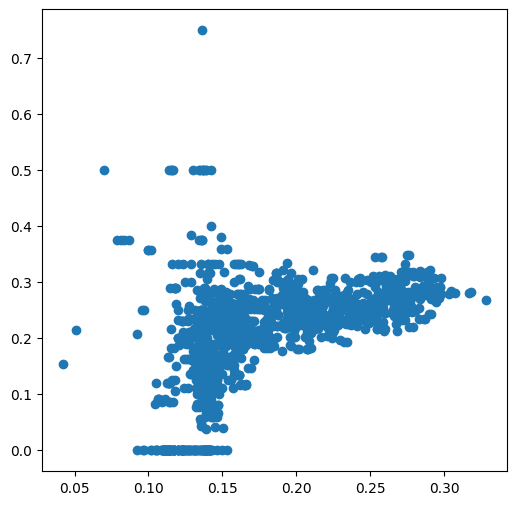

In [109]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(batting27pred['AVG'], bat27YTest['AVG27'])
x = batting27pred['AVG'].reset_index(drop=True)
y = bat27YTest['AVG27'].reset_index(drop=True)
weights = bat27YTest['PA27'].reset_index(drop=True)
corr_avg = weighted_corr(x, y, weights)
print("Weighted correlation for AVG:", corr_avg)

Weighted correlation for PA: 0.9544968768797362


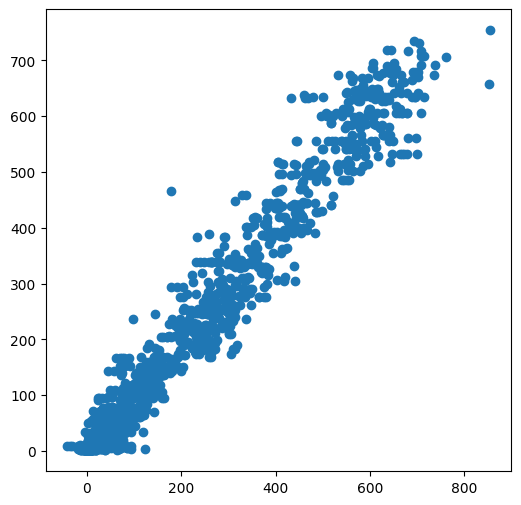

In [110]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(batting27pred['PA'], bat27YTest['PA27'])
x = batting27pred['PA'].reset_index(drop=True)
y = bat27YTest['PA27'].reset_index(drop=True)
weights = bat27YTest['PA27'].reset_index(drop=True)
corr_pa = weighted_corr(x, y, weights)
print("Weighted correlation for PA:", corr_pa)

Weighted correlation for BABIP: 0.31261275018045687


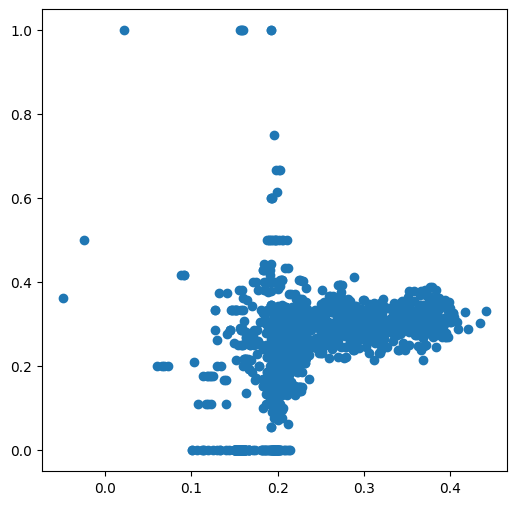

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(batting27pred['BABIP'], bat27YTest['BABIP27'])
x = batting27pred['BABIP'].reset_index(drop=True)
y = bat27YTest['BABIP27'].reset_index(drop=True)
weights = bat27YTest['PA27'].reset_index(drop=True)
corr_babip = weighted_corr(x, y, weights)
print("Weighted correlation for BABIP:", corr_babip)

Weighted correlation for K%: 0.4576170729174102


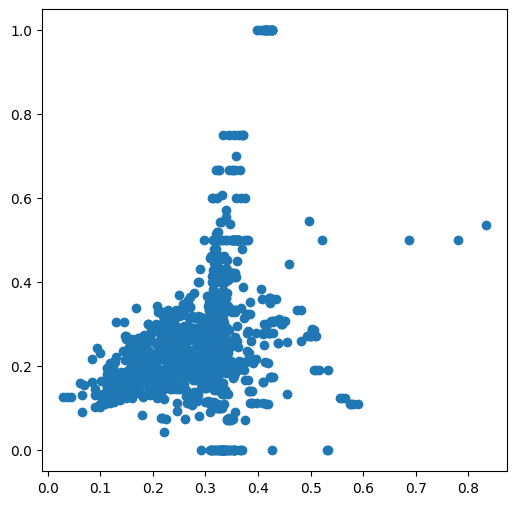

In [112]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(batting27pred['K%'], bat27YTest['K%27'])
x = batting27pred['K%'].reset_index(drop=True)
y = bat27YTest['K%27'].reset_index(drop=True)
weights = bat27YTest['PA27'].reset_index(drop=True)
corr_k = weighted_corr(x, y, weights)
print("Weighted correlation for K%:", corr_k)

Weighted correlation for BB%: 0.2704358277492328


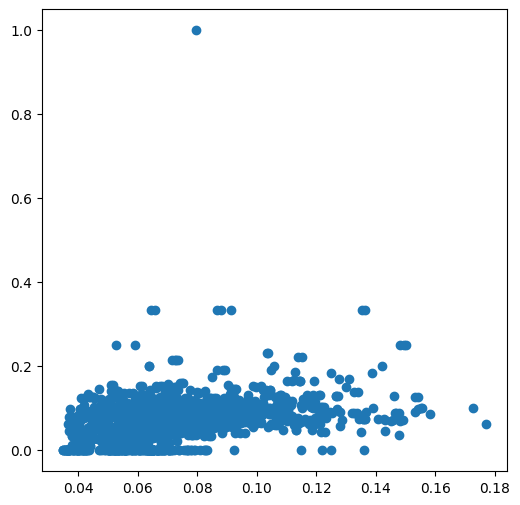

In [113]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(batting27pred['BB%'], bat27YTest['BB%27'])
x = batting27pred['BB%'].reset_index(drop=True)
y = bat27YTest['BB%27'].reset_index(drop=True)
weights = bat27YTest['PA27'].reset_index(drop=True)
corr_bb = weighted_corr(x, y, weights)
print("Weighted correlation for BB%:", corr_bb)

Weighted correlation for HR%: 0.7336329433301182


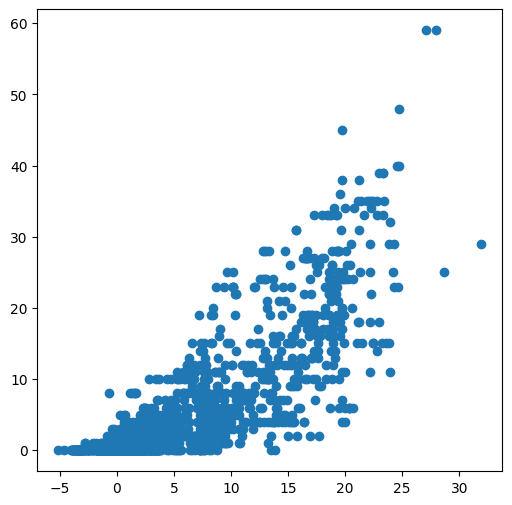

In [114]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(batting27pred['HR%'], bat27YTest['HR27'])
x = batting27pred['HR%'].reset_index(drop=True)
y = bat27YTest['HR27'].reset_index(drop=True)
weights = bat27YTest['PA27'].reset_index(drop=True)
corr_hr = weighted_corr(x, y, weights)
print("Weighted correlation for HR%:", corr_hr)